In [ ]:
# Exercise 1: Implementing Linear Regression for Regression Task on Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data                # shape (150, 4): the feature matrix
print(X)
y = iris.target              # shape (150,): integer class labels (0,1,2)
print(y)
names = iris.feature_names
print(names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Linear regression:
predict sepal width from sepal length

X (features / independent variable) → always 2D array of shape (n_samples, n_features)

Each row = one flower sample.

Each column = one feature (like sepal length, petal width, etc.).

Example with 3 flowers and 1 feature (sepal length only):

X = [[5.1], [4.9], [6.2]]

shape = (3 samples, 1 feature)
y (target / dependent variable) → always 1D array of shape (n_samples,)

Only one output value per sample (sepal width here).

Example:

y = [3.5, 3.0, 3.4]

shape = (3 samples,)

In [2]:
X_lr = X[:, [0]]             # take column 0 (sepal length) as a 2D array
y_lr = X[:, 1]               # take column 1 (sepal width) as 1D array
print(X_lr)
print(y_lr)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [3]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=0
)
print(X_train_lr.shape)
print(X_test_lr.shape)
print(y_train_lr.shape)
print(y_test_lr.shape)

lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)

print("Linear Regression MSE:", mean_squared_error(y_test_lr, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test_lr, y_pred_lr))

(120, 1)
(30, 1)
(120,)
(30,)
Linear Regression MSE: 0.19662051068027644
Linear Regression R²: 0.03280247260467428


A lower MSE means predictions are closer to actual values. R² (coefficient of determination) measures how much variance in y (sepal width) is explained by x (sepal length). Here, 0.0328 ≈ 3%, which means sepal length doesn’t strongly predict sepal width.

In biology terms: Sepal length and width are almost independent traits.

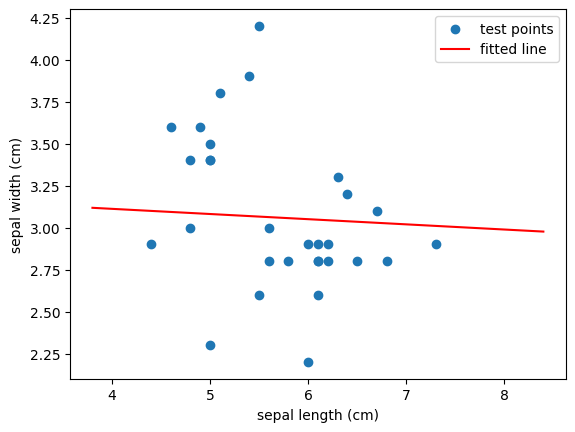

In [4]:

xs = np.linspace(X_lr.min() - 0.5, X_lr.max() + 0.5, 100).reshape(-1, 1)
plt.scatter(X_test_lr, y_test_lr, label="test points")
plt.plot(xs, lr.predict(xs), color="red", label="fitted line")
plt.xlabel(names[0])
plt.ylabel(names[1])
plt.legend()
plt.show()

np.linspace(start, stop, 100) → creates 100 evenly spaced values between X_lr.min() - 0.5 and X_lr.max() + 0.5.

This covers the full range of sepal length values, with a small margin (−0.5, +0.5) for nicer plotting.

Example: if min sepal length = 4.3 and max = 7.9 → values go from 3.8 to 8.4.

.reshape(-1, 1) → reshapes the array into a 2D column vector (shape (100,1)) because scikit-learn’s .predict() expects 2D input for features. So xs is now a smooth range of sepal lengths.

plt.scatter(X_test_lr, y_test_lr, label="test points") Plots the test data points (X = sepal length, Y = actual sepal width).

Each dot = a real flower sample.

Label "test points" will show in the legend.

python Copy code plt.plot(xs, lr.predict(xs), color="red", label="fitted line") lr.predict(xs) → predicts sepal width for each of the 100 smooth xs values.

Plots a red line connecting those predictions → this is the regression line.

Label "fitted line" will also appear in the legend.